# **Understanding Dropout in Neural Networks — Notebook Summary**

## **1. Purpose of This Notebook**

This notebook demonstrates **why dropout improves generalization** in neural networks.
You train **two regression models** on a small, noisy dataset:

* **Model 1:** Standard neural network (no dropout)
* **Model 2:** Network with dropout layers

The comparison clearly shows the effect of dropout on overfitting.

---

## **2. Dataset Description**

* `X_train` is generated using evenly spaced values from **–1 to 1**.
* `y_train` is a noisy nonlinear target array.
* Data is split into:

  * **80% training**
  * **20% testing**

The dataset is intentionally small to make **overfitting more visible**.

---

## **3. Model 1 — Normal Regression Network**

This model contains:

* Dense(64, relu)
* Dense(32, relu)
* Dense(1) output
* Optimizer: **Adam (lr = 0.01)**
* Loss: **Mean Squared Error**

### **Expected Behavior**

* Fits the training data very well
* Performs poorly on test data → **overfitting**

---

## **4. Model 2 — Regression Model with Dropout**

This model adds:

* `Dropout(0.3)` after the first layer
* `Dropout(0.2)` after the second layer

### **Why Dropout?**

Dropout **randomly disables neurons** during training, forcing the model to learn more robust patterns.

### **Expected Behavior**

* Training loss slightly higher
* Test loss significantly lower
* Smoother, more stable predictions → **better generalization**

---

## **5. Evaluation & Visualization**

The notebook:

* Predicts with both models on `X_test`
* Computes **Mean Squared Error (MSE)**
* Plots:

  * Training points (red)
  * Test points (blue)
  * Model prediction curve

The plots visually show the advantage of using dropout.

---

## **6. Key Takeaways**

* Dropout reduces overfitting by making the network less dependent on specific neurons.
* A model without dropout memorizes training data.
* A model with dropout generalizes better to unseen data.
* Dropout is especially helpful for **small datasets**.



In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [3]:
X_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

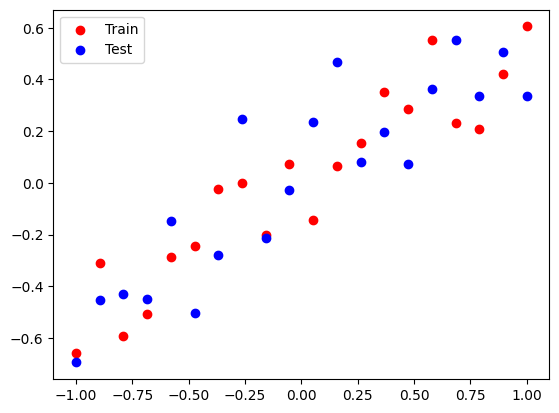

In [7]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [8]:
model_1 = Sequential()

model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=True)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-21 04:01:38.080357: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0202 - mse: 0.0202 - val_l

In [9]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0037801216822117567, Test: 0.04550591856241226


In [10]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


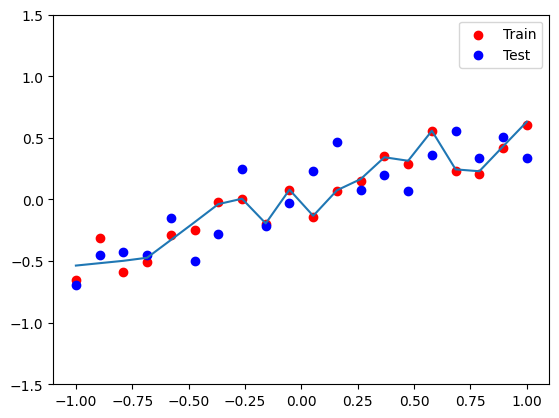

In [11]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [12]:
model_2 = Sequential()

model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1343 - mse: 0.1343 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0666 - val_mse: 0.0666
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1312 - mse: 0.1312 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0477 - mse: 0.

In [17]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.01673148386180401, Test: 0.0320846363902092


In [14]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


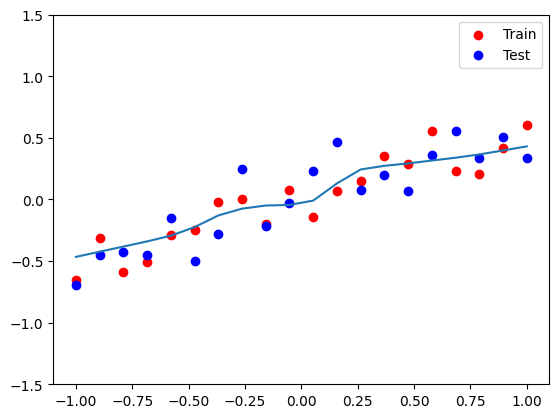

In [15]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()